In [11]:
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [13]:
stock = "TSLA"   # Change to any stock symbol (TSLA, MSFT, GOOGL, etc.)
df = yf.download(stock, start="2015-01-01", end="2025-01-01")
df.head()


/tmp/ipython-input-3930586086.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [14]:
df["Close_1"] = df["Close"].shift(1)
df["Close_2"] = df["Close"].shift(2)
df["Close_3"] = df["Close"].shift(3)

df["MA7"] = df["Close"].rolling(7).mean()
df["MA14"] = df["Close"].rolling(14).mean()
df["MA30"] = df["Close"].rolling(30).mean()

df["Volatility"] = df["High"] - df["Low"]

df["Next_Close"] = df["Close"].shift(-1)

df = df.dropna()
df.head()


Price,Close,High,Low,Open,Volume,Close_1,Close_2,Close_3,MA7,MA14,MA30,Volatility,Next_Close
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,
Date,,,,,,,,,,,,,
2015-02-13,13.584667,13.732667,13.394000,13.526667,92865000,13.525333,14.186667,14.419333,14.205429,14.064619,13.787844,0.338667,13.623333
2015-02-17,13.623333,13.713333,13.433333,13.713333,59694000,13.584667,13.525333,14.186667,14.046953,14.056857,13.754600,0.280000,13.630667
2015-02-18,13.630667,13.744667,13.506667,13.611333,40704000,13.623333,13.584667,13.525333,13.924095,14.081095,13.742089,0.238000,14.114000
2015-02-19,14.114000,14.162667,13.583333,13.666667,77311500,13.630667,13.623333,13.584667,13.869143,14.112095,13.743044,0.579334,14.474000
2015-02-20,14.474000,14.506667,13.987333,14.052000,89731500,14.114000,13.630667,13.623333,13.876953,14.176429,13.756733,0.519334,13.822667


In [15]:
features = [
    "Open", "High", "Low", "Volume",
    "Close_1", "Close_2", "Close_3",
    "MA7", "MA14", "MA30",
    "Volatility"
]

X = df[features]
y = df["Next_Close"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


In [18]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=10
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [19]:
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Improved Linear Regression MSE:", lr_mse)
print("Improved Random Forest MSE:", rf_mse)

print("\nLR RMSE:", np.sqrt(lr_mse))
print("RF RMSE:", np.sqrt(rf_mse))


Improved Linear Regression MSE: 79.2653115021591
Improved Random Forest MSE: 175.02846497452788

LR RMSE: 8.903106845487091
RF RMSE: 13.22983238648653


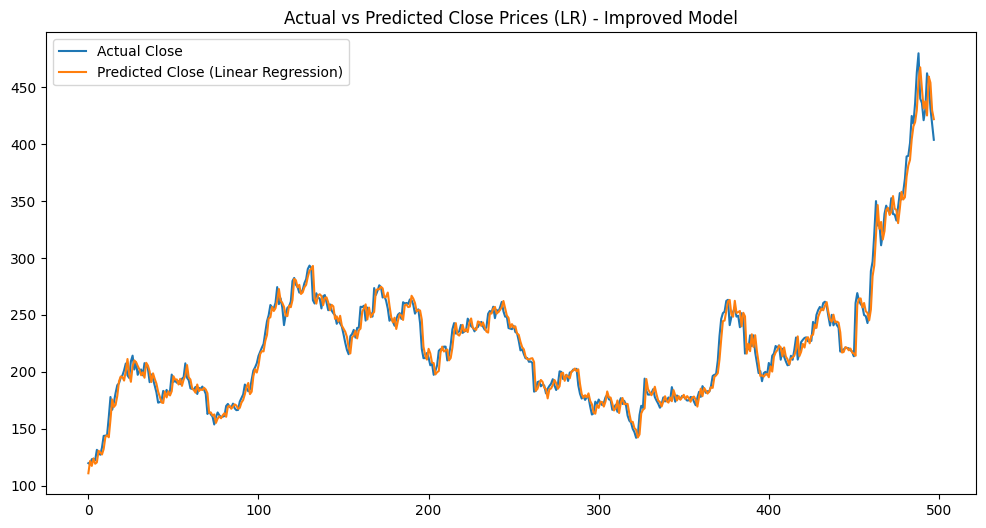

In [20]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(lr_pred, label="Predicted Close (Linear Regression)")
plt.legend()
plt.title("Actual vs Predicted Close Prices (LR) - Improved Model")
plt.show()


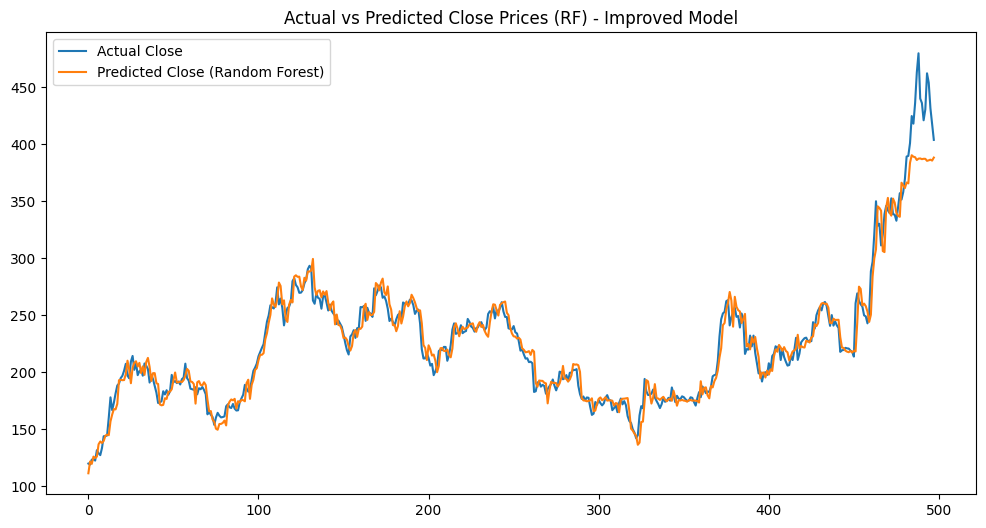

In [21]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(rf_pred, label="Predicted Close (Random Forest)")
plt.legend()
plt.title("Actual vs Predicted Close Prices (RF) - Improved Model")
plt.show()
